In [29]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [30]:
# Change map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue", "tomato", "tomato","gold"][::-1])

# Windows

- Run the snakemakepipeline in the scripts folder of this project. 
- You need gfastats windows command to get the output

## We start with an example (chromosome 1)

In [31]:
# File name for testing
f = "../results/window/chr1.gfastats.window.300000.txt"
f_path = "/".join(f.split("/")[:-1])

In [32]:
print(f_path)

../results/window


In [33]:
# Read the data frame from gfastats
df = pd.read_csv(f, sep = "\t", header = None)

In [34]:
# First row is index and check with head()
df.set_index(0, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,,,,,,,,,,,,,,,,,,,,,
10002#1#Chr1,27.366130,26.739693,27.63119,27.202243,27.411050,27.236327,27.456450,26.969920,27.223297,27.413023,...,26.987403,26.658583,26.957467,27.251600,27.531100,27.277757,27.266374,NaN,NaN,NaN
10015#1#Chr1,27.397517,26.511363,27.31680,27.231430,26.843450,26.632963,27.275553,26.946353,27.560867,27.025867,...,26.762973,26.710497,26.988617,26.467257,27.162053,27.296523,27.033611,NaN,NaN,NaN
10024#1#Chr1,26.952843,26.651747,27.16734,27.126117,26.616353,26.791863,27.335193,27.106167,26.967040,27.274083,...,26.935550,26.589903,27.404870,27.474720,26.966679,NaN,NaN,NaN,NaN,NaN
1741#1#Chr1,27.474347,27.020943,27.39877,27.377770,27.461347,27.275973,27.604580,27.102130,27.413280,27.437370,...,26.591853,26.568193,27.457087,27.082770,27.086967,27.282600,27.495260,27.447943,27.332024,NaN
22001f#1#Chr1,27.137520,26.847520,26.67749,27.250587,27.256917,26.923293,27.134057,26.827757,27.270743,27.357320,...,26.982840,26.133653,27.249657,25.260163,27.091057,27.304413,26.188857,NaN,NaN,NaN


In [35]:
# Write file for Anna
df22 = df.fillna("NaN")
df22.to_csv("chr1.tsv", sep = "\t")


In [36]:
len(df.columns)

102

Check for nice looking

In [37]:
bins_where = [0,10,20]
bins_what = ["dsada", "dasda", "dasdas"]
size = "300kb"

Text(-5.387152777777784, 0.5, 'Accession')

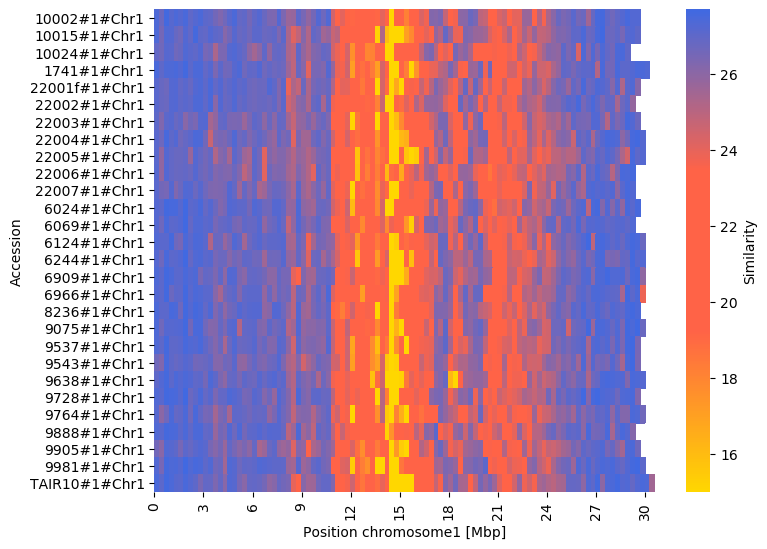

In [38]:
# Plot it as an example

bins_where = [x for x in range(len(df.columns)) if x%10 == 0]
bins_what = [i*3 for i, x in enumerate(range(len(bins_where)))]
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.heatmap(df, vmin = 15, cmap = cmap, cbar_kws={'label': 'Similarity'}, xticklabels = bins_what)
plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95])  # Adjust as needed
ax.set_xticks(bins_where)
plt.xlabel("Position chromosome1" + " [Mbp]")
plt.ylabel("Accession")

# Now run all chromosomes
- Create plots
    - Adjust ticks
    - Maybe remove "ChrX" suffix
- Safe data for Anna

1
2
3
4
5


<Figure size 1000x600 with 0 Axes>

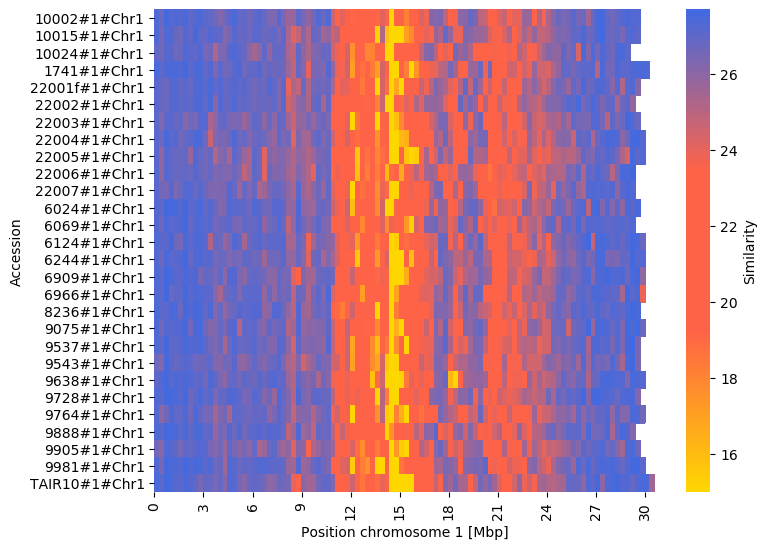

<Figure size 1000x600 with 0 Axes>

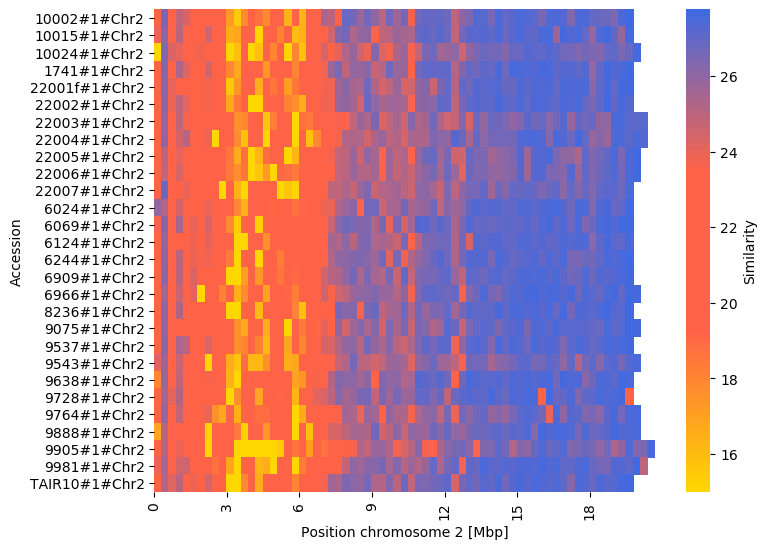

<Figure size 1000x600 with 0 Axes>

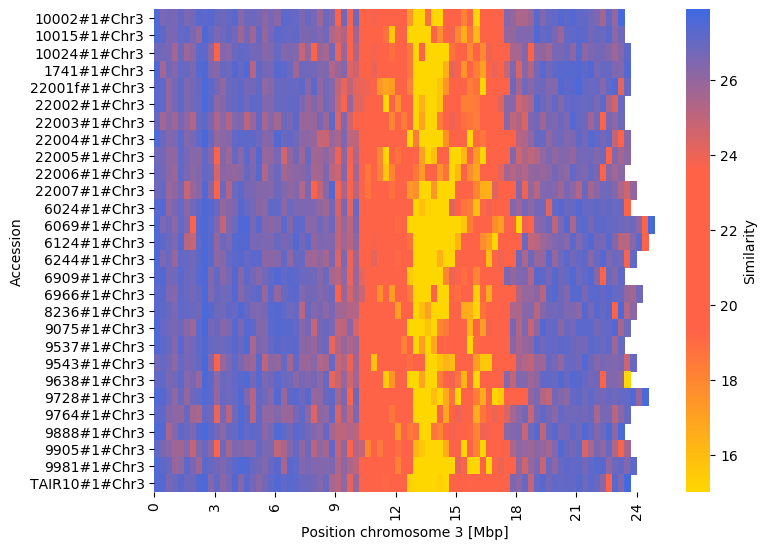

<Figure size 1000x600 with 0 Axes>

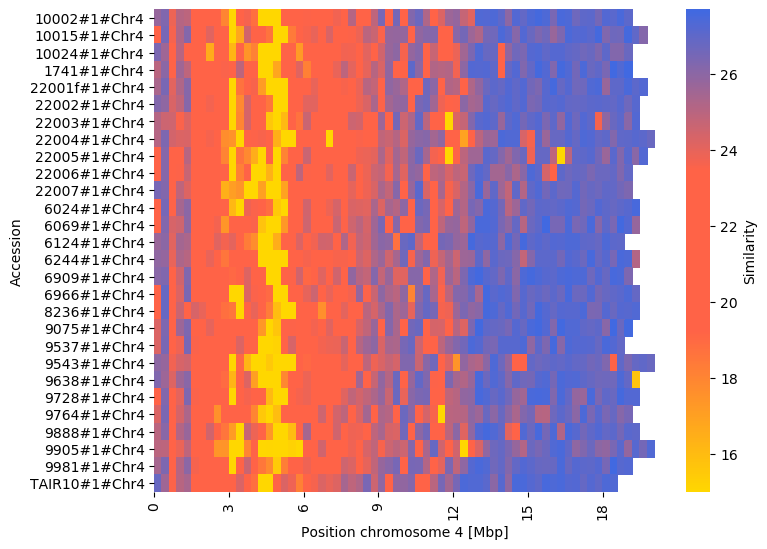

<Figure size 1000x600 with 0 Axes>

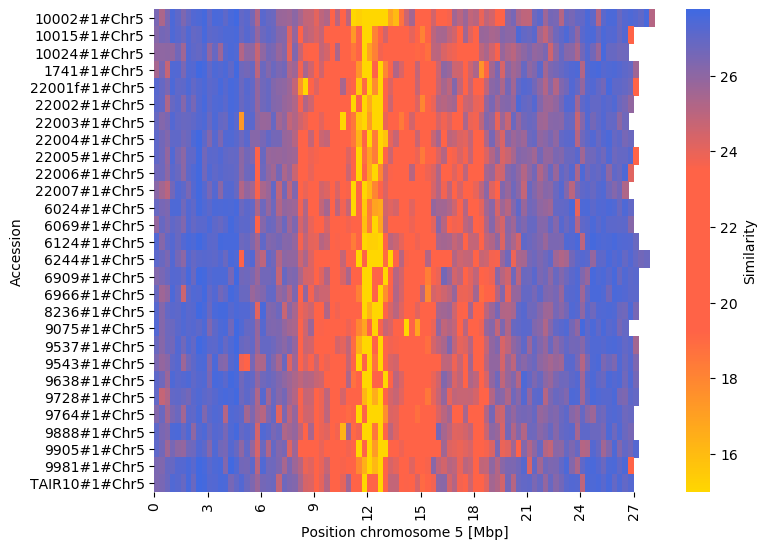

In [40]:
chrom = [1,2,3,4,5]
for x in chrom: 
    # Read the data frame from gfastats
    df = pd.read_csv(f_path + "/chr" + str(x) + ".gfastats.window.300000.txt", sep = "\t", header = None)
    
    df22 = df.fillna("NaN")
    output_file = "data_created/windows/chr" + str(x) + "." + size + ".tsv"
    with open(output_file, 'w') as f:
        f.write("# " + "Each value represent the average similarty value in " + str(size) + " bins"+ "\n")
        f.write("# " + "Similarity value: Number of unique accession/paths found in each node"+ "\n")
    df22.to_csv(output_file, mode = "a", sep = "\t", header = False)
    
    
    # First row is index and check with head()
    df.set_index(0, inplace=True)
    bins_where = [x for x in range(len(df.columns)) if x%10 == 0]
    bins_what = [i*3 for i, x in enumerate(range(len(bins_where)))]
    # Plot it as an example
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.figure(figsize=(10, 6))  # Set the figure size
    ax = sns.heatmap(df, vmin = 15, cmap = cmap, cbar_kws={'label': 'Similarity'}, xticklabels = bins_what)
    plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95])  # Adjust as needed
    ax.set_xticks(bins_where)
    plt.xlabel("Position chromosome " + str(x) + " [Mbp]")
    plt.ylabel("Accession")
    plt.savefig("plots/windows/sbins_window_chr"+ str(x) + ".pdf")
    print(x)